In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Open the Amazon dataset and create a column that counts the number of characters in the feedback.
df_amazon = pd.read_csv('amazon_cells_labelled.txt', delimiter= '\t', header=None)
df_amazon.columns = ['feedback', 'sentiment']
df_amazon['text_length'] = df_amazon['feedback'].apply(len)
df_amazon.head()

,feedback,sentiment,text_length
0,So there is no way for me to plug it in here i...,0,82
1,"Good case, Excellent value.",1,27
2,Great for the jawbone.,1,22
3,Tied to charger for conversations lasting more...,0,79
4,The mic is great.,1,17


 A negative feedback/sentiment is indicated by 0, while positive, 1.

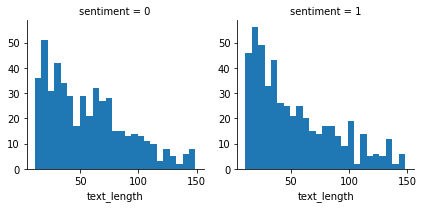

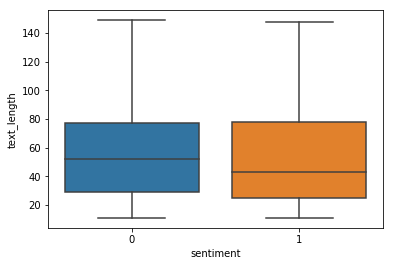

In [3]:
# Create plots to show distribution of text length vs. sentiment.
g = sns.FacetGrid(data=df_amazon, col='sentiment')
g.map(plt.hist, 'text_length', bins=25)
plt.show()
sns.boxplot(x='sentiment', y='text_length', data=df_amazon)
plt.show()

The distributions are roughly similar; therefore, feedback length is not necessarily a predictor of sentiment.

In [4]:
# Count the number of positive and negative reviews.
positive = df_amazon[(df_amazon['sentiment'] == 1)]
print('Number of positive reviews: {}'.format(positive.shape[0]))
negative = df_amazon[(df_amazon['sentiment'] == 0)]
print('Number of negative reviews: {}'.format(negative.shape[0]))

Number of positive reviews: 500
Number of negative reviews: 500


Not much can be inferred from the number of reviews since they're equally divided.

Create a feature vector that will perform the classification task. Use ski-kit learn's CountVectorizer(), which takes the 
bag of words approach, to create a matrix of numbers to represent the reviews. Each review will be separated into words (i.e.,
tokens) and the number of times each token occurs in a review will be counted. Passing the feedback column to CountVectorizer's default settings will convert words to lowercase, remove punctuation, and exclude duplicates and words with less than two letters. The output can be modified by setting specific arguments, e.g., analyzer.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(df_amazon['feedback'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [6]:
# Print the tokens and their corresponding counts.
print(vect.vocabulary_)

{'so': 1491, 'there': 1609, 'is': 854, 'no': 1074, 'way': 1766, 'for': 653, 'me': 993, 'to': 1640, 'plug': 1212, 'it': 857, 'in': 814, 'here': 762, 'the': 1604, 'us': 1714, 'unless': 1702, 'go': 711, 'by': 233, 'converter': 367, 'good': 715, 'case': 259, 'excellent': 569, 'value': 1733, 'great': 721, 'jawbone': 864, 'tied': 1630, 'charger': 281, 'conversations': 366, 'lasting': 901, 'more': 1033, 'than': 1599, '45': 20, 'minutes': 1021, 'major': 977, 'problems': 1245, 'mic': 1012, 'have': 749, 'jiggle': 866, 'get': 698, 'line': 929, 'up': 1708, 'right': 1361, 'decent': 416, 'volume': 1745, 'if': 799, 'you': 1843, 'several': 1427, 'dozen': 485, 'or': 1118, 'hundred': 792, 'contacts': 357, 'then': 1607, 'imagine': 805, 'fun': 681, 'of': 1096, 'sending': 1416, 'each': 506, 'them': 1606, 'one': 1106, 'are': 112, 'razr': 1294, 'owner': 1144, 'must': 1050, 'this': 1618, 'needless': 1060, 'say': 1391, 'wasted': 1763, 'my': 1052, 'money': 1029, 'what': 1781, 'waste': 1762, 'and': 91, 'time': 1

In [7]:
# Transform the CountVectorizer object to create a document term matrix populated with token counts.
dtm_amazon = vect.transform(df_amazon['feedback'])
print(dtm_amazon)

  (0, 233)	1
  (0, 367)	1
  (0, 653)	1
  (0, 711)	1
  (0, 762)	1
  (0, 814)	2
  (0, 854)	1
  (0, 857)	1
  (0, 993)	1
  (0, 1074)	1
  (0, 1212)	1
  (0, 1491)	1
  (0, 1604)	1
  (0, 1609)	1
  (0, 1640)	1
  (0, 1702)	1
  (0, 1714)	1
  (0, 1766)	1
  (1, 259)	1
  (1, 569)	1
  (1, 715)	1
  (1, 1733)	1
  (2, 653)	1
  (2, 721)	1
  (2, 864)	1
  :	:
  (997, 989)	1
  (997, 1081)	1
  (997, 1189)	1
  (998, 453)	1
  (998, 829)	1
  (998, 852)	1
  (998, 854)	1
  (998, 993)	1
  (998, 1109)	1
  (998, 1221)	1
  (998, 1323)	1
  (998, 1602)	1
  (998, 1604)	2
  (998, 1614)	1
  (999, 95)	1
  (999, 240)	1
  (999, 243)	1
  (999, 1065)	1
  (999, 1081)	1
  (999, 1105)	1
  (999, 1604)	1
  (999, 1699)	1
  (999, 1812)	1
  (999, 1824)	1
  (999, 1843)	1


The resulting matrix is in compressed sparse row format (i.e., sparse matrix), which means only the location and value of 
non-zero values is saved. For example, the first object (0, 233) indicates the 234th feature (i.e., token/word) has one instance
in the first feedback.

In [8]:
# Show the equivalent dataframe (i.e., dense matrix version).
pd.DataFrame(dtm_amazon.toarray(), columns=vect.get_feature_names())

,10,100,11,12,13,15,15g,18,20,2000,...,wrongly,year,years,yell,yes,yet,you,your,z500a,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Each row represents a feedback and each column a word. The numbers represent the word's count in the feedback.

Word counts are discrete features; therefore, use the multinomial Naive Bayes classifier. The model is trained by creating 
probability classes based on the tokens' instances in both sentiments. As an example:

| word      | 1   | 0  | Total |
|-----------|-----|----|-------|
| product   | 50  | 50 | 100   |
| functions | 75  | 25 | 100   |
| well      | 90  | 10 | 100   |
| total     | 215 | 85 | 300   |

Positive class = 215/300 = 0.717 <br>
Negative class = 85/300 = 0.283

A feedback that consists of - "Product functions well." - can be broken down as:

Positive class = (0.717)(50/215)(75/215)(90/215) = 0.024 <br>
Negative class = (0.283)(50/85)(25/85)(10/85) = 0.006

The higher positive class rating indicates the feedback can be classified in the positive category.

In [9]:
# Build the multinomial Naive Bayes model and fit to the training dataset (i.e., Amazon)
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(dtm_amazon, df_amazon['sentiment'])

# Determine training accuracy.
pred_amazon = mnb.predict(dtm_amazon)
print("Number of mislabeled points out of a total {} points: {}".format(dtm_amazon.shape[0],(df_amazon['sentiment'] != pred_amazon).sum()))
print("Training accuracy: {}".format((dtm_amazon.shape[0] - (df_amazon['sentiment'] != pred_amazon).sum()) / dtm_amazon.shape[0]))

Number of mislabeled points out of a total 1000 points: 35
Training accuracy: 0.965


In [10]:
# Open the Yelp dataset.
df_yelp = pd.read_csv('yelp_labelled.txt', delimiter= '\t', header=None)
df_yelp.columns = ['feedback', 'sentiment']
df_yelp['text_length'] = df_yelp['feedback'].apply(len)
df_yelp.head()

,feedback,sentiment,text_length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [11]:
# Test and evaluate the model on the yelp dataset.
dtm_yelp = vect.transform(df_yelp['feedback'])
pred_yelp = mnb.predict(dtm_yelp)
print("Number of mislabeled points out of a total {} points: {}".format(dtm_yelp.shape[0],(df_yelp['sentiment'] != pred_yelp).sum()))
print("Model accuracy on yelp dataset: {}".format((dtm_yelp.shape[0] - (df_yelp['sentiment'] != pred_yelp).sum()) / dtm_yelp.shape[0]))

Number of mislabeled points out of a total 1000 points: 269
Model accuracy on yelp dataset: 0.731


In [12]:
# Open the imdb dataset.
df_imdb = pd.read_csv('imdb_labelled.txt', delimiter= '\t', header=None)
df_imdb.columns = ['feedback', 'sentiment']
df_imdb['text_length'] = df_yelp['feedback'].apply(len)
df_imdb.head()

,feedback,sentiment,text_length
0,"A very, very, very slow-moving, aimless movie ...",0,24
1,Not sure who was more lost - the flat characte...,0,18
2,Attempting artiness with black & white and cle...,0,41
3,Very little music or anything to speak of.,0,87
4,The best scene in the movie was when Gerardo i...,1,59


In [13]:
# Test and evaluate the model on the imdb dataset.
dtm_imdb = vect.transform(df_imdb['feedback'])
pred_imdb = mnb.predict(dtm_imdb)
print("Number of mislabeled points out of a total {} points: {}".format(dtm_imdb.shape[0],(df_imdb['sentiment'] != pred_imdb).sum()))
print("Model accuracy on imdb dataset: {}".format((dtm_imdb.shape[0] - (df_imdb['sentiment'] != pred_imdb).sum()) / dtm_imdb.shape[0]))

Number of mislabeled points out of a total 748 points: 236
Model accuracy on imdb dataset: 0.6844919786096256


The relatively low accuracy on the tests could be explained by "unseen" data. Since the datasets cover different categories, tokens observed on the training set may not exist on the tests, thereby affecting performance. Instead of creating the model from one dataset that's tested on the others, each dataset should have a derived model to test on.